In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt

In [17]:
#Graph for total water volume by phase
#group data by totals
#create summary tables of the plots 
#set parameters, will be added to function at later date
directory_list = {"EGM" : r"H:\Englishman\2021\Analysis\swe_tables\processing\graphs", "VAN": r"H:\Metro-Van\2021\Analysis\swe_tables"}
parameter = "zbin"
wshed= "VAN"
subbasin = "Seymour"
file = parameter + "\\" + parameter + "_" + subbasin + "_all.csv"
print(file)

 
twv_title_metrovan = "Total Water Volume, 2021 \n Upper Seymour"
out_directory_list = {"EGM": r"H:\Englishman\2021\Analysis\figures\SWE_elevation", 
                      "VAN": r"H:\Metro-Van\2021\Analysis\figures\SWE_elevation_graphs"}


totalwatervol_output = "Total Water Volume" + wshed + "_" + subbasin + ".png"

os.chdir(directory_list[wshed])
df = pd.read_csv(file)
print(df)

zbin\zbin_Seymour_all.csv
      zbin  swe_mm  swe_lm   swe_hm   water_vol    lower_wv    upper_wv  Phase
0    200.0  277.99  277.99   277.99    27407.23    27407.23    27407.23      1
1    300.0  207.77  207.77   207.77   508889.16   508889.16   508889.16      1
2    400.0  233.06  233.06   233.06   661883.67   661883.67   661883.67      1
3    500.0  285.26  285.26   285.26   863296.93   863296.93   863296.93      1
4    600.0  361.28  361.28   361.28  1390505.99  1390505.99  1390505.99      1
..     ...     ...     ...      ...         ...         ...         ...    ...
70  1200.0  537.70  498.60   576.81  3742592.03  3470403.52  4014780.55      5
71  1300.0  728.34  675.37   781.31  3911974.76  3627467.50  4196482.01      5
72  1400.0  912.31  845.96   978.66  2679432.02  2484564.24  2874299.80      5
73  1500.0  907.05  841.09   973.02   804850.69   746316.09   863385.28      5
74  1600.0  971.23  900.60  1041.87   221985.68   205841.26   238130.09      5

[75 rows x 8 columns]


In [6]:
#first need to combine csvs into one
def combine_csv(file_name, basin, directory):
    os.chdir(directory)
    # Match the pattern (‘csv’) and save the list of file names in the ‘all_filenames’ variable.
    extension = 'csv'
    df = pd.DataFrame()
    for item in glob.glob('*.{}'.format(extension)):
        if basin in item:
            file = pd.read_csv(item)
            df = df.append(file)
    df = df.drop_duplicates()
    # export to csv
    df.to_csv(file_name, index=False)

#comment out if already combined
#combine_csv(parameter + "_" + subbasin + "_all.csv",subbasin, os.path.join(directory_list[wshed],parameter))
#print(directory_list[wshed])
combine_csv("VAN_aspect_all.csv", "Seymour", r"H:\Metro-Van\2021\Analysis\swe_tables\aspect")

In [18]:
sum = df.groupby(
    ["Phase"]).agg({  
    "water_vol": "sum",
    "lower_wv": "sum",
    "upper_wv" : "sum"
}).round(2).reset_index()
display(sum)
#sum["Phase"]= sum["Phase"].astype(str)
#name = "summary_" + name
#sum.to_csv(name,index=True)

,Phase,water_vol,lower_wv,upper_wv
0,1,71104972.10,71104972.10,71104972.10
1,2,80157043.60,70836457.14,89477630.07
2,3,78491741.74,75352072.08,83201246.26
3,4,50195000.55,47057813.01,53332188.09
4,5,18457192.37,17114851.08,19799533.62


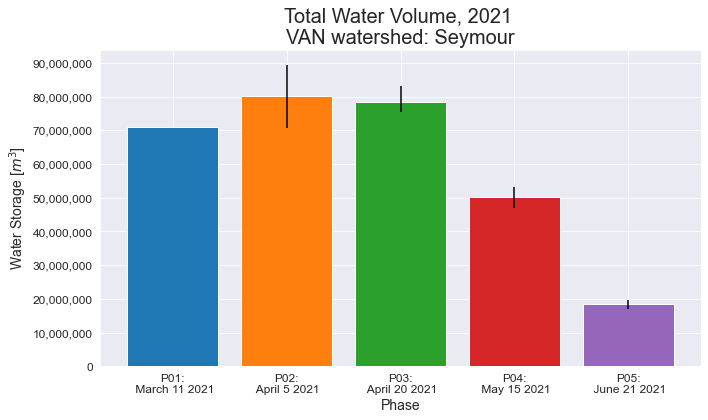

In [30]:


sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
color_list = sns.color_palette()[:5]
plt.bar(sum["Phase"], sum["water_vol"], color=color_list)

#set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.set_title(totalwatervol_title, fontsize = 20)
# including upper limits



#ax.yaxis.set_ticks(np.arange(0, 1700, 200))

ax.set_ylabel("Water Storage [$m^{3}$]", fontsize=14)
ax.set_xlabel("Phase", fontsize=14)
labels2021 = ["P01:\n March 11 2021", "P02:\n April 5 2021", "P03:\n April 20 2021", "P04:\n May 15 2021", "P05:\n June 21 2021"]
plt.xticks(sum.Phase, fontsize=12)
ax.set_xticklabels(labels2021)



VAN_tick_labels = ["0", "10,000,000", "20,000,000", "30,000,000", "40,000,000", "50,000,000", "60,000,000", "70,000,000", "80,000,000","90,000,000"]

#Englishman errorbars
plt.vlines(sum["Phase"],sum["lower_wv"],sum["upper_wv"],color="black")
plt.yticks(np.arange(0, 100000000, step=10000000),fontsize=12)
ax.set_yticklabels(VAN_tick_labels)

EGM_yticklabels = ["0","500,000","1,000,000","1,500,000", "2,000,000", "2,500,000", "3,000,000", "3,500,000", "4,000,000", "4,500,000", "5,000,000", "5,500,000", "6,000,000","6,500,000","7,000,000"]

os.chdir(out_directory_list[wshed])
plt.savefig(totalwatervol_output)
plt.show()